In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [2]:
def extend_dataframe(olddf, vals, metric, name):
    new = pd.DataFrame()
    new['Value'] = vals
    new['Metric'] = metric
    new['Model'] = name
    olddf = olddf.append(new)
    return(olddf)

In [3]:
newdf = pd.DataFrame(columns = ['Value', 'Metric', 'Model'])

labels = ['RFC:Scaffold', 'SVM:Scaffold', 'FFN:Scaffold', 'dummy1', 'ChemBERTa:Random', 'ChemBERTa:Scaffold', 'dummy2', 'AttentiveFP:Random', 'AttentiveFP:Scaffold', 'dummy3', 'D-MPNN:Random', 'D-MPNN:Scaffold']

# paths since they are all in different folders
rfc_path = 'rfc_hyperopt_pk_37k/rfc_final_122/'
svm_path = 'svm_hyperopt_pk_37k/svm_final_15/'
ffn_path = 'ffn_hyperopt_pk_37k/ffn_final_20/'
chemb_prefix = 'chemberta_pk_37k/'
chemb_rand_path = chemb_prefix+'random_split_chemberta_models/'
chemb_scaff_path = chemb_prefix+'scaffold_split_chemberta_models/'
attent_prefix = 'attentivefp_pk_37k/'
attent_rand_path = attent_prefix+'random_split_attentivefp_models/'
attent_scaff_path = attent_prefix+'scaffold_split_attentivefp_models/'
gnn_prefix = 'pk_37k_screen_models_03192022/'
gnn_rand_path = gnn_prefix+'FINALbayHO04052022/'
gnn_scaff_path = gnn_prefix+'FINALbayHO04052022_with_scaffold_split/'
for fold, name in zip([rfc_path, svm_path, ffn_path, '', chemb_rand_path, chemb_scaff_path, '', attent_rand_path, attent_scaff_path, '', gnn_rand_path, gnn_scaff_path], labels):
    if 'dummy' in name:
        newdf = extend_dataframe(newdf, [-0.1], 'auPR', name) # empty
        newdf = extend_dataframe(newdf, [-0.1], 'auROC', name)

    elif 'ChemBERTa' in name or 'AttentiveFP' in name:
        df = pd.read_csv('../models/other_models/' + fold + 'summary_results.csv')
        newdf = extend_dataframe(newdf, list(df['auPR']), 'auPR', name) # 20 folds
        newdf = extend_dataframe(newdf, list(df['auROC']), 'auROC', name)

    elif 'D-MPNN' not in name:
        df = pd.read_csv('../models/other_models/' + fold + 'test_scores.csv')
        newdf = extend_dataframe(newdf, list(df.iloc[0,3:33]), 'auPR', name) # 30 folds
        newdf = extend_dataframe(newdf, list(df.iloc[0,35:65]), 'auROC', name)

    else:
        print(name)
        df = pd.read_csv('../models/' + fold + 'test_scores.csv')
        newdf = extend_dataframe(newdf, list(df.iloc[0,3:8]), 'auPR', name) # 5 folds of 10 ensemble models each
        newdf = extend_dataframe(newdf, list(df.iloc[0,10:15]), 'auROC', name)

df = newdf
df

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4

D-MPNN:Random
D-MPNN:Scaffold


/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_90075/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4

,Value,Metric,Model
0,0.336715,auPR,RFC:Scaffold
1,0.427412,auPR,RFC:Scaffold
2,0.479889,auPR,RFC:Scaffold
3,0.398663,auPR,RFC:Scaffold
4,0.45406,auPR,RFC:Scaffold
...,...,...,...
0,0.857449,auROC,D-MPNN:Scaffold
1,0.926313,auROC,D-MPNN:Scaffold
2,0.9224,auROC,D-MPNN:Scaffold
3,0.914238,auROC,D-MPNN:Scaffold


In [4]:
# new order so GNN is last
from pandas.api.types import CategoricalDtype
cat_model_order = CategoricalDtype(
    labels, 
    ordered=True
)
df['Model'] = df['Model'].astype(cat_model_order)
df.sort_values('Model')
df

,Value,Metric,Model
0,0.336715,auPR,RFC:Scaffold
1,0.427412,auPR,RFC:Scaffold
2,0.479889,auPR,RFC:Scaffold
3,0.398663,auPR,RFC:Scaffold
4,0.45406,auPR,RFC:Scaffold
...,...,...,...
0,0.857449,auROC,D-MPNN:Scaffold
1,0.926313,auROC,D-MPNN:Scaffold
2,0.9224,auROC,D-MPNN:Scaffold
3,0.914238,auROC,D-MPNN:Scaffold


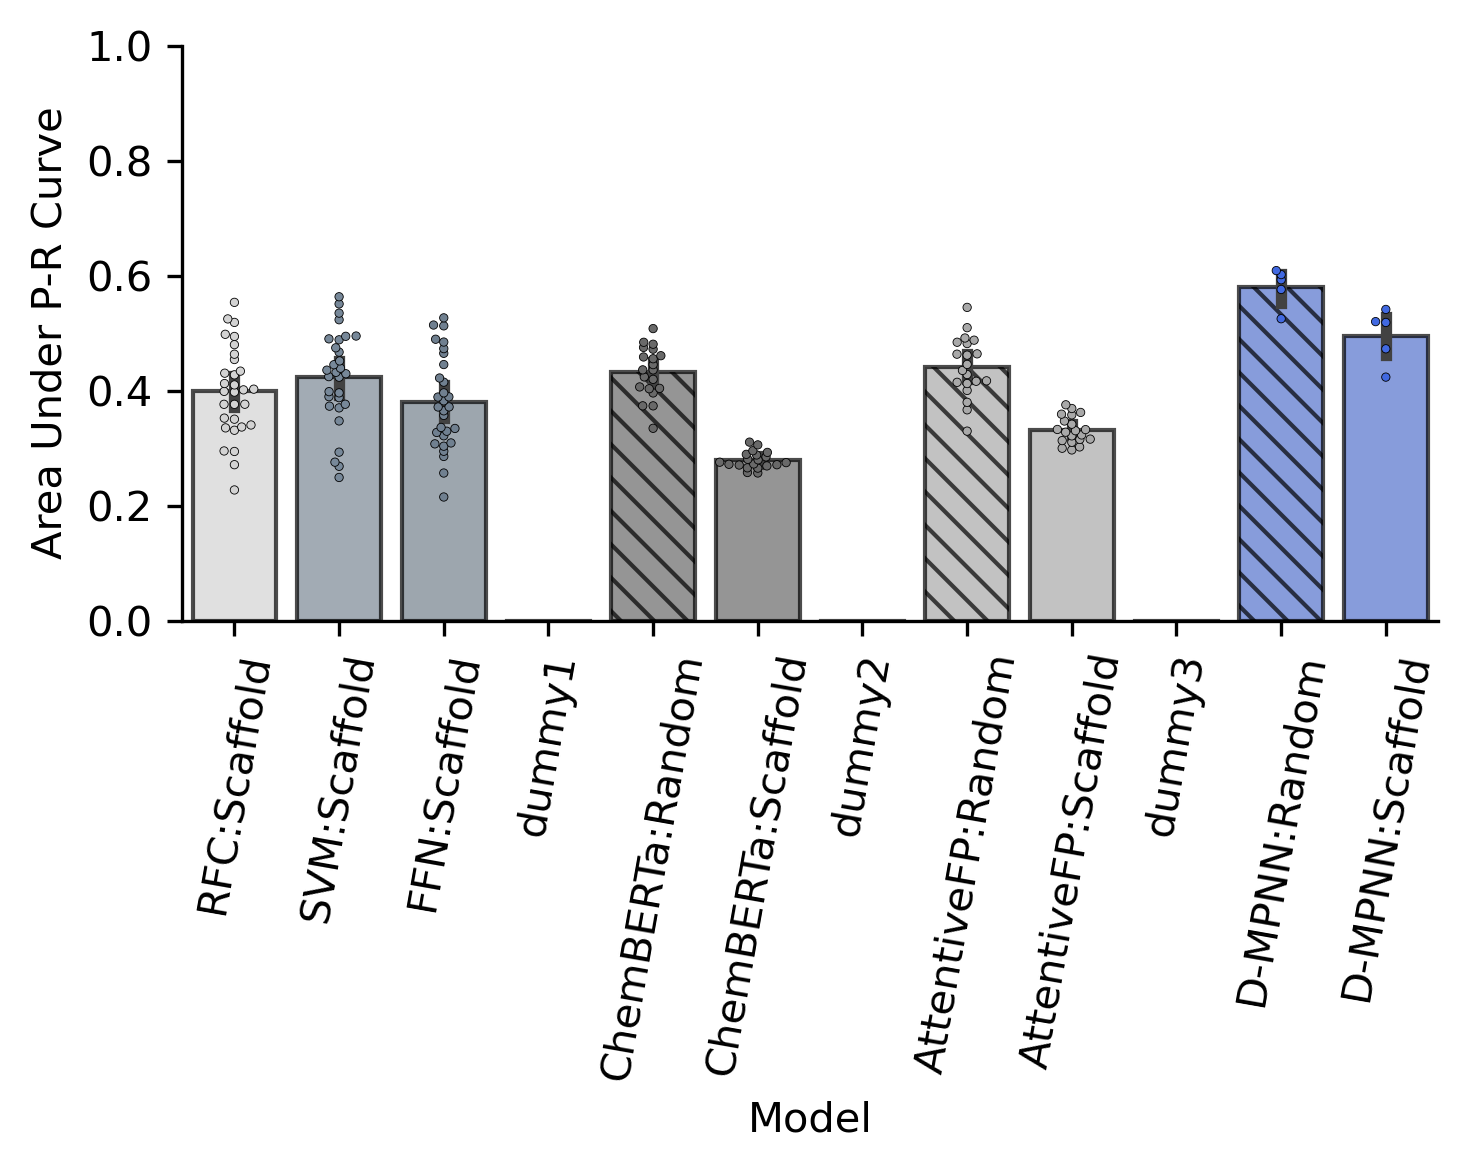

In [5]:

plt.figure(figsize=(5,4), dpi=300)
aupr_df = df[df['Metric'] == 'auPR']
my_pal = dict(zip(labels, ["lightgrey", "lightslategrey","slategrey",'white','dimgrey','dimgrey','white','darkgrey','darkgrey','white','royalblue', 'royalblue']))
ax = sns.swarmplot(data=aupr_df, x = 'Model', y = 'Value', edgecolor='black', linewidth = 0.2, s = 2, label='', palette = my_pal)
sns.barplot(data=aupr_df, x = 'Model', y = 'Value',  edgecolor='black', linewidth = 1, alpha = 0.7, palette = my_pal)
handles, labs = ax.get_legend_handles_labels()

# Define some hatches
# Loop over the bars
# weird numbering convention - loops over colors https://stackoverflow.com/questions/35467188/is-it-possible-to-add-hatches-to-each-individual-bar-in-seaborn-barplot
#extend_labels = [x for x in labels for _ in (0, 1)] # can use for plotting auPR and auROC in same plot
hatches = [' ' if 'Scaffold' in x else '\\\\\\' for x in labels]

for i,thisbar in enumerate(ax.patches):
    thisbar.set_hatch(hatches[i])

plt.xlabel('Model')
plt.ylim([0,1.0])
plt.xticks(rotation = 80)
plt.ylabel('Area Under P-R Curve')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('../figure_panels/model_comparison_aupr.svg')
plt.savefig('../figure_panels/model_comparison_aupr.png')
plt.show()

/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


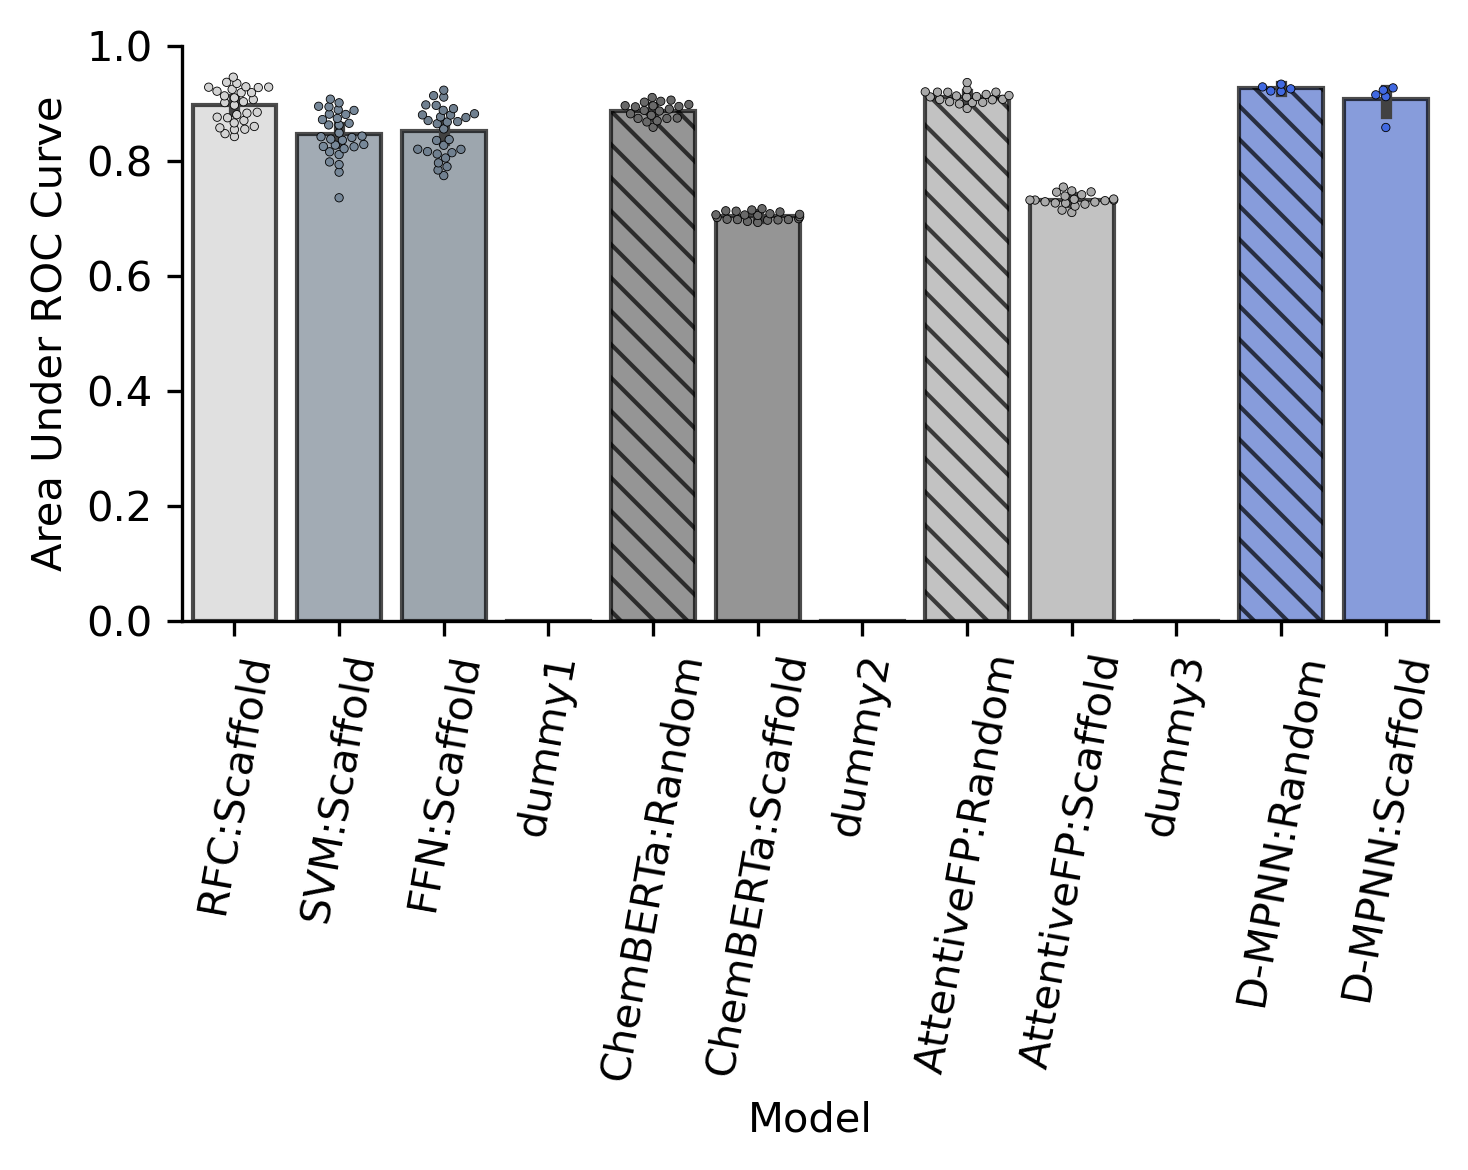

In [6]:

plt.figure(figsize=(5,4), dpi=300)
aupr_df = df[df['Metric'] == 'auROC']
my_pal = dict(zip(labels, ["lightgrey", "lightslategrey","slategrey",'white','dimgrey','dimgrey','white','darkgrey','darkgrey','white','royalblue', 'royalblue']))
ax = sns.swarmplot(data=aupr_df, x = 'Model', y = 'Value', edgecolor='black', linewidth = 0.2, s = 2, label='', palette = my_pal)
sns.barplot(data=aupr_df, x = 'Model', y = 'Value',  edgecolor='black', linewidth = 1, alpha = 0.7, palette = my_pal)
handles, labs = ax.get_legend_handles_labels()

# Define some hatches
# Loop over the bars
# weird numbering convention - loops over colors https://stackoverflow.com/questions/35467188/is-it-possible-to-add-hatches-to-each-individual-bar-in-seaborn-barplot
#extend_labels = [x for x in labels for _ in (0, 1)] # can use for plotting auPR and auROC in same plot
hatches = [' ' if 'Scaffold' in x else '\\\\\\' for x in labels]

for i,thisbar in enumerate(ax.patches):
    thisbar.set_hatch(hatches[i])

plt.xlabel('Model')
plt.ylim([0,1.0])
plt.xticks(rotation = 80)
plt.ylabel('Area Under ROC Curve')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('../figure_panels/model_comparison_auroc.svg')
plt.savefig('../figure_panels/model_comparison_auroc.png')
plt.show()

In [10]:
gnns = df[['D-MPNN:Scaffold' in x for x in list(df['Model'])]]
gnn_aurocs = list(gnns[gnns['Metric'] == 'auROC']['Value'])
gnn_auprs = list(gnns[gnns['Metric'] == 'auPR']['Value'])

ffns = df[['FFN' in x for x in list(df['Model'])]]
ffn_aurocs = list(ffns[ffns['Metric'] == 'auROC']['Value'])
ffn_auprs = list(ffns[ffns['Metric'] == 'auPR']['Value'])

svms = df[['SVM' in x for x in list(df['Model'])]]
svm_aurocs = list(svms[svms['Metric'] == 'auROC']['Value'])
svm_auprs = list(svms[svms['Metric'] == 'auPR']['Value'])

rfcs = df[['RFC' in x for x in list(df['Model'])]]
rfc_aurocs = list(rfcs[rfcs['Metric'] == 'auROC']['Value'])
rfc_auprs = list(rfcs[rfcs['Metric'] == 'auPR']['Value'])

chembertas = df[['ChemBERTa:Scaffold' in x for x in list(df['Model'])]]
chemberta_aurocs = list(chembertas[chembertas['Metric'] == 'auROC']['Value'])
chemberta_auprs = list(chembertas[chembertas['Metric'] == 'auPR']['Value'])

attents = df[['AttentiveFP:Scaffold' in x for x in list(df['Model'])]]
attent_aurocs = list(attents[attents['Metric'] == 'auROC']['Value'])
attent_auprs = list(attents[attents['Metric'] == 'auPR']['Value'])

In [11]:
display(sp.ttest_ind(gnn_aurocs, ffn_aurocs))
display(sp.ttest_ind(gnn_aurocs, svm_aurocs))
display(sp.ttest_ind(gnn_aurocs, rfc_aurocs))
display(sp.ttest_ind(gnn_aurocs, chemberta_aurocs))
display(sp.ttest_ind(gnn_aurocs, attent_aurocs))

Ttest_indResult(statistic=2.788409037209769, pvalue=0.008723352435355687)

Ttest_indResult(statistic=3.2704979769071376, pvalue=0.002516142667299433)

Ttest_indResult(statistic=0.7126047824951163, pvalue=0.4810989745437422)

Ttest_indResult(statistic=30.408286653721508, pvalue=4.462789230018626e-20)

Ttest_indResult(statistic=22.707964010928386, pvalue=2.984622942838385e-17)

In [12]:
display(sp.ttest_ind(gnn_auprs, ffn_auprs))
display(sp.ttest_ind(gnn_auprs, svm_auprs))
display(sp.ttest_ind(gnn_auprs, rfc_auprs))
display(sp.ttest_ind(gnn_auprs, chemberta_auprs))
display(sp.ttest_ind(gnn_auprs, attent_auprs))

Ttest_indResult(statistic=3.0664442382457726, pvalue=0.00430192427830364)

Ttest_indResult(statistic=1.9106606650795077, pvalue=0.06476884517283478)

Ttest_indResult(statistic=2.6412134549244386, pvalue=0.012525981363435162)

Ttest_indResult(statistic=18.222004625628706, pvalue=3.642214417886275e-15)

Ttest_indResult(statistic=11.221957208944334, pvalue=8.320672440940226e-11)